## Imports

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import re
%matplotlib inline

## Settings to enable real-time output from a shell command

In [2]:
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic

@register_line_magic
def runrealcmd(command):
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True)
    for line in iter(process.stdout.readline, b''):
        print(line.rstrip().decode('utf-8'))
    process.stdout.close()
    process.wait()

### Download the input file from here:
http://download.smartdatalake.eu/datasets/dblp/dblp_authors_papers.csv.zip

# 1. Vary the similarity threshold

## 1.a Load and optionally edit the config file

In [3]:
config_file_example = '../config.json.example'
config_file = '../config.json'
input_file = '../data/dblp_authors_papers.csv'
output_file = '../data/output/dblp_authors_papers_selfjoin_out.csv'
log_file = '../data/output/log.txt'

params = json.load(open(config_file_example))
params['input_file'] = input_file
del(params['query_file'])
params['output_file'] = output_file
params['log_file'] = log_file
params['join_type'] = 'threshold'
params['mode'] = 'fuzzy'
params['fuzzyset_column'] = '1'
params['set_column'] = '2'
params['tokens_column'] = '3'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['max_lines'] = '10000'

## 1.b Run the experiment

In [4]:
stats = pd.DataFrame(0, index=[0.5, 0.6, 0.7, 0.8, 0.9], columns=['NumMatches', 'Time'])
for thres in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print('Threshold is {}'.format(thres))
    params['threshold']= str(thres)
    json.dump(params, open(config_file, 'w'), indent=4)
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    x = open(log_file).read()
    stats.loc[thres,'NumMatches'] = re.findall(r'Total Matches: (\d+)', x)[-1]
    stats.loc[thres,'Time'] = re.findall(r'Total Join Time: (\d+\.\d+) sec', x)[-1]

Threshold is 0.5
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311. Tokens per Element: 1.0
Read time: 0.097963402 sec.
Transform time: 0.069320589 sec.
Collection size: 209
Indexing time: 0.028714977 sec.
Join time: 0.220864257 sec. 0m 0s
Number of matches: 25
Threshold is 0.6
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311. Tokens per Element: 1.0
Read time: 0.103243517 sec.
Transform time: 0.079613385 sec.
Collection size: 209
Indexing time: 0.032522672 sec.
Join time: 0.23108905 sec.: 0m 0s
Number of matches: 15
Threshold is 0.7
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311. Tokens per Element: 1.0
Read time: 0.111010776 sec.
Transform time: 0.089730157 sec.
Collection size: 209
Indexing time: 0.029818945 sec.
Join time: 0.214578782 sec. 0m 0s
Nu

In [5]:
stats

,NumMatches,Time
0.5,25,0.179546888
0.6,15,0.183131582
0.7,14,0.16876104
0.8,13,0.155092718
0.9,13,0.165969801


## 1.c Plot the results

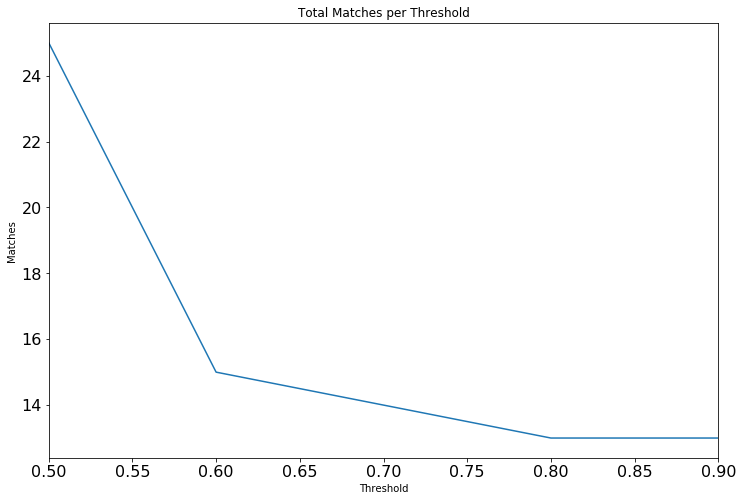

In [6]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Threshold')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Threshold')

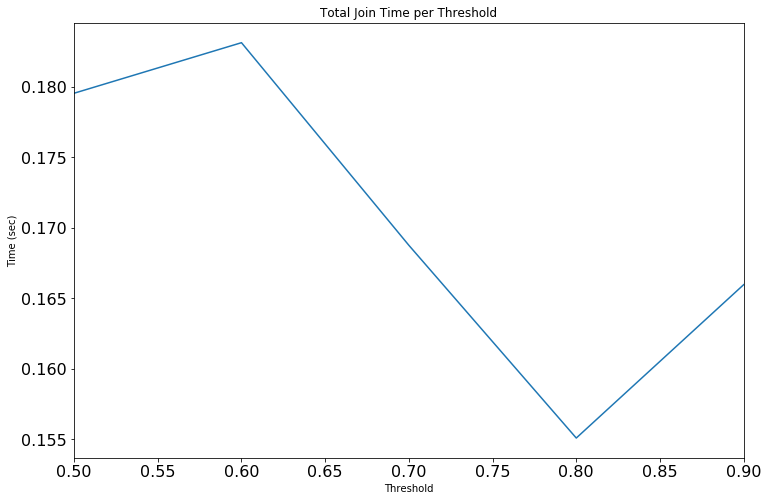

In [7]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Threshold')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Threshold')

# 2. Vary dataset size

## 2.a Load and optionally edit the config file

In [8]:
params = json.load(open(config_file_example))
params['input_file'] = input_file
del(params['query_file'])
params['output_file'] = output_file
params['log_file'] = log_file
params['join_type'] = 'threshold'
params['mode'] = 'fuzzy'
params['set_column'] = '1'
params['element_column'] = '2'
params['tokens_column'] = '3'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['sim_threshold']= '0.8'

## 2.b Run the experiment

In [9]:
stats = pd.DataFrame(0, index=np.arange(.2,1.1,.2), columns=['NumMatches', 'Time'])
size = 50000
for prop in np.arange(.2,1.1,.2):
    print('Size is {}% or {:,}'.format(int(prop*100), int(prop*size)))
    params['max_lines']= str(int(prop*size))
    json.dump(params, open(config_file, 'w'), indent=4)
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    x = open(log_file).read()
    stats.loc[prop,'NumMatches'] = re.findall(r'Total Matches: (\d+)', x)[-1]
    stats.loc[prop,'Time'] = re.findall(r'Total Join Time: (\d+\.\d+) sec', x)[-1]

Size is 20% or 10,000
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311. Tokens per Element: 1.0
Read time: 0.113779453 sec.
Transform time: 0.083597537 sec.
Collection size: 209
Indexing time: 0.039892733 sec.
Join time: 0.254700147 sec. 0m 0s
Number of matches: 25
Size is 40% or 20,000
Finished reading file. Lines read: 20000. Lines skipped due to errors: 0. Num of sets: 376. Elements per set: 53.191489361702125. Tokens per Element: 1.0
Read time: 0.158926485 sec.
Transform time: 0.129177894 sec.
Collection size: 376
Indexing time: 0.073897288 sec.
Join time: 0.333316324 sec. 0m 0s
Number of matches: 38
Size is 60% or 30,000
Finished reading file. Lines read: 30000. Lines skipped due to errors: 0. Num of sets: 550. Elements per set: 54.54545454545455. Tokens per Element: 1.0
Read time: 0.234801563 sec.
Transform time: 0.190579481 sec.
Collection size: 550
Indexing time: 0.050242299 sec.
Join time: 0.3648112

In [10]:
stats

,NumMatches,Time
0.2,25,0.20098738
0.4,38,0.244541339
0.6,59,0.293131037
0.8,70,0.303199563
1.0,93,0.306385632


## 2.c Plot the results

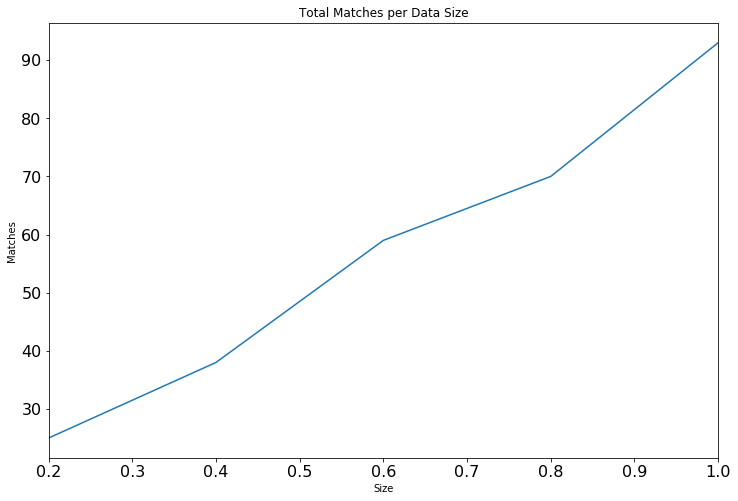

In [11]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Size')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Data Size')

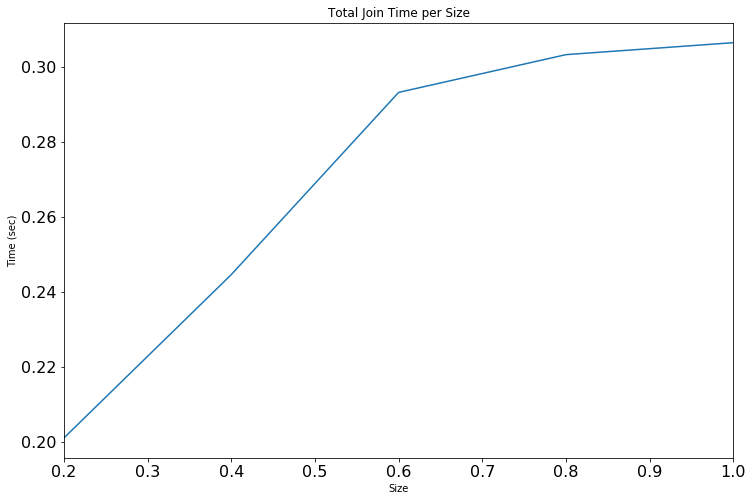

In [12]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Size')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Size')

# 3. Histogram of similarity scores

## 3.a Load and optionally edit the config file

In [13]:
params = json.load(open(config_file_example))
params['input_file'] = input_file
del(params['query_file'])
params['output_file'] = output_file
params['log_file'] = log_file
params['join_type'] = 'threshold'
params['mode'] = 'fuzzy'
params['set_column'] = '1'
params['element_column'] = '2'
params['tokens_column'] = '3'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['threshold']= '0.6'
params['max_lines'] = '10000'
json.dump(params, open(config_file, 'w'), indent=4)

## 3.b Run the experiment

In [14]:
%runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file

Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311. Tokens per Element: 1.0
Read time: 0.101728276 sec.
Transform time: 0.070431049 sec.
Collection size: 209
Indexing time: 0.037381059 sec.
Join time: 0.194351013 sec. 0m 0s
Number of matches: 15


## 3.c Plot the results

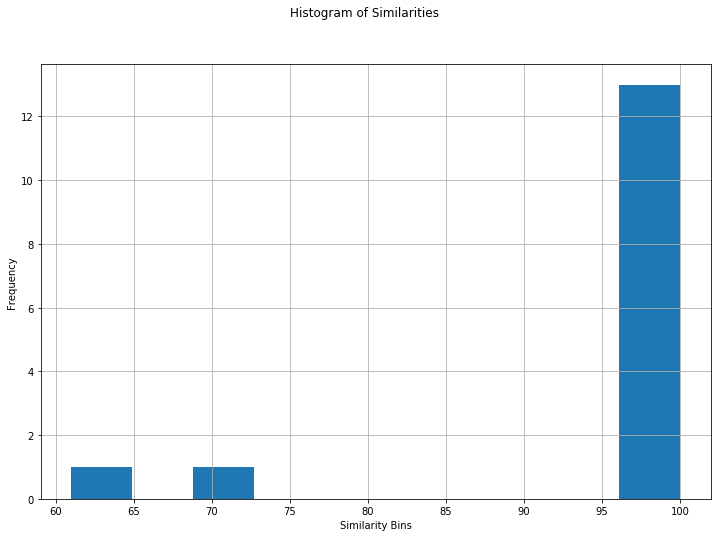

In [15]:
out1 = pd.read_csv(output_file, header=None, names=['User_ID_1', 'User_ID_2', 'Similarity'])
out1['Bin'] = (out1.Similarity*100).astype('int')
out1.head()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Similarity Bins')
ax.set_ylabel('Frequency')
pl.suptitle("Histogram of Similarities")
out1.Bin.hist()